In [ ]:
# env - CS_6100

In [1]:
from scipy.interpolate import RectSphereBivariateSpline, griddata
import numpy as np
import numpy.lib.recfunctions as npl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import shiftgrid

%matplotlib notebook

In [20]:
ray_range = np.linspace(10, 170, 9) * np.pi / 180.

ray_angle = np.linspace(0, 350, 18) * np.pi / 180.

data = np.dot(np.atleast_2d(90. - np.linspace(-80., 80., 18)).T,

              np.atleast_2d(180. - np.abs(np.linspace(0., 350., 9)))).T


In [21]:
print(f'ray_range{ray_range}')
print(f'ray_angle{ray_angle}')

ray_range[0.17453293 0.52359878 0.87266463 1.22173048 1.57079633 1.91986218
 2.26892803 2.61799388 2.96705973]
ray_angle[0.         0.35933249 0.71866499 1.07799748 1.43732997 1.79666247
 2.15599496 2.51532745 2.87465994 3.23399244 3.59332493 3.95265742
 4.31198992 4.67132241 5.0306549  5.3899874  5.74931989 6.10865238]


In [24]:
new_lats = np.linspace(1, 180, 180) * np.pi / 180

new_lons = np.linspace(1, 360, 360) * np.pi / 180

new_lats, new_lons = np.meshgrid(new_lats, new_lons)


In [25]:
lut = RectSphereBivariateSpline(ray_range, ray_angle, data)

In [26]:
data_interp = lut.ev(new_lats.ravel(),\
                     new_lons.ravel()).reshape((360, 180)).T

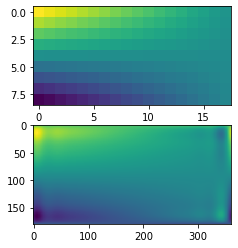

In [27]:
fig = plt.figure()

ax1 = fig.add_subplot(211)

ax1.imshow(data, interpolation='nearest')

ax2 = fig.add_subplot(212)

ax2.imshow(data_interp, interpolation='nearest')

plt.show()



In [3]:
def get_interp_grid(lats, lons, data, grid_size_degree, mesh=False):
        # Page 32 of: https://skemman.is/bitstream/1946/16233/1/final_processingwithpython_dillon.pdf  
        # We want to interpolate it to a global x-degree grid
        deg2rad = np.pi/180.
        #new_lats = np.linspace(grid_size_deg, 180, 180/grid_size_deg)
        #new_lons = np.linspace(grid_size_deg, 360, 360/grid_size_deg)
        #new_lats_mesh, new_lons_mesh = np.meshgrid(new_lats*deg2rad, new_lons*deg2rad)
        lats_range_rad = lats*deg2rad
        lons_range_rad = lons*deg2rad
        print(f'u = {lats_range_rad}')
        print(f'v = {lons_range_rad}')
        #We need to set up the interpolator object’’’
        lut = RectSphereBivariateSpline(lats_range_rad, lons_range_rad, data)
        
        #Finally we interpolate the data. The RectSphereBivariateSpline
        #object only takes 1-D arrays as input, therefore we need to do some reshaping.
        #new_lats = new_lats_mesh.ravel()
        #new_lons = new_lons_mesh.ravel()
        #print(lats,lons)
        data_interp = lut.ev((lats_rad).ravel(),(lons_rad).ravel().reshape((100,100)))
        #if mesh == True:
        #    data_interp = data_interp.reshape((360/grid_size_deg,
        #                180/grid_size_deg)).T
        return lats/deg2rad, lons/deg2rad, data_interp

In [10]:
data = np.dot(np.atleast_2d(5 - np.linspace(0., 30, 100)).T,

              np.atleast_2d(7 - np.abs(np.linspace(0., 70, 100)))).T
xrange = np.linspace(-100.0, -97.75, 100)
yrange = np.linspace(43.0, 45.25, 100)
xlocs, ylocs = np.meshgrid(xrange, yrange)
#data = np.random.rand(np.shape(xlocs)[0], np.shape(xlocs)[1])
#dataout, lonsout = shiftgrid(lon0=0, datain=data, lonsin=xlocs, cyclic=(xrange[0]-xrange[-1]))
print(np.shape(xlocs))
print(np.shape(data))
data

(100, 100)
(100, 100)


array([[  35.        ,   32.87878788,   30.75757576, ..., -170.75757576,
        -172.87878788, -175.        ],
       [  31.46464646,   29.55769819,   27.65074992, ..., -153.50933578,
        -155.41628405, -157.32323232],
       [  27.92929293,   26.23660851,   24.54392409, ..., -136.26109581,
        -137.95378023, -139.64646465],
       ...,
       [-307.92929293, -289.26691154, -270.60453015, ..., 1502.32170187,
        1520.98408326, 1539.64646465],
       [-311.46464646, -292.58800122, -273.71135598, ..., 1519.56994184,
        1538.44658708, 1557.32323232],
       [-315.        , -295.90909091, -276.81818182, ..., 1536.81818182,
        1555.90909091, 1575.        ]])

In [12]:
data_interp_2 = np.array(get_interp_grid(lats=ylocs, lons=xlocs, data=data, grid_size_degree=.025))
#print(data_interp_2)

u = [[0.75049158 0.75049158 0.75049158 ... 0.75049158 0.75049158 0.75049158]
 [0.75088824 0.75088824 0.75088824 ... 0.75088824 0.75088824 0.75088824]
 [0.75128491 0.75128491 0.75128491 ... 0.75128491 0.75128491 0.75128491]
 ...
 [0.78896816 0.78896816 0.78896816 ... 0.78896816 0.78896816 0.78896816]
 [0.78936482 0.78936482 0.78936482 ... 0.78936482 0.78936482 0.78936482]
 [0.78976149 0.78976149 0.78976149 ... 0.78976149 0.78976149 0.78976149]]
v = [[-1.74532925 -1.74493259 -1.74453592 ... -1.70685268 -1.70645601
  -1.70605934]
 [-1.74532925 -1.74493259 -1.74453592 ... -1.70685268 -1.70645601
  -1.70605934]
 [-1.74532925 -1.74493259 -1.74453592 ... -1.70685268 -1.70645601
  -1.70605934]
 ...
 [-1.74532925 -1.74493259 -1.74453592 ... -1.70685268 -1.70645601
  -1.70605934]
 [-1.74532925 -1.74493259 -1.74453592 ... -1.70685268 -1.70645601
  -1.70605934]
 [-1.74532925 -1.74493259 -1.74453592 ... -1.70685268 -1.70645601
  -1.70605934]]


ValueError: u must be strictly increasing

In [7]:
print(np.shape(data_interp_2[2]))

NameError: name 'data_interp_2' is not defined

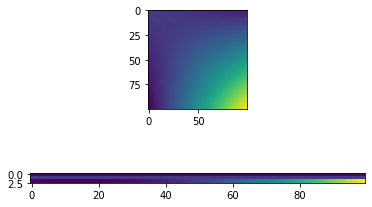

In [42]:
fig = plt.figure()

ax1 = fig.add_subplot(211)

ax1.imshow(data, interpolation='nearest')

ax2 = fig.add_subplot(212)

ax2.imshow(data_interp_2, interpolation='nearest')

plt.show()

In [4]:
data = np.dot(np.atleast_2d(5 - np.linspace(0., 30, 10)).T,
              np.atleast_2d(7 - np.abs(np.linspace(0., 70, 10)))).T

xrange_native = np.linspace(0, 360, 10)*np.pi/180.
yrange_native = np.linspace(0, 90, 10)*np.pi/180.

xrange = np.linspace(-100.0, -97.75, 100)*np.pi/180.
yrange = np.linspace(43.0, 45.25, 100)*np.pi/180.

xlocs, ylocs = np.meshgrid(xrange, yrange)

print(f'xrange {xrange_native}')
print(f'yrange {yrange_native}')

'''
print(f'xlocs {xlocs}')
print(f'ylocs {ylocs}')
'''

xrange [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
yrange [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]


"\nprint(f'xlocs {xlocs}')\nprint(f'ylocs {ylocs}')\n"

In [3]:
lut = RectSphereBivariateSpline(u=yrange_native, v=xrange_native, r=data)

ValueError: u should be between (0, pi)

In [49]:
data_interp = lut.ev(ylocs.ravel(),xlocs.ravel()).reshape((100,100))

In [50]:
np.shape(data_interp)

(100, 100)

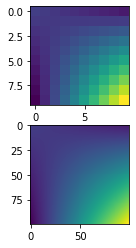

In [51]:
fig = plt.figure()

ax1 = fig.add_subplot(211)

ax1.imshow(data, interpolation='nearest')

ax2 = fig.add_subplot(212)

ax2.imshow(data_interp, interpolation='nearest')

plt.show()


In [2]:
x, y = np.meshgrid(np.linspace(0, 30,720), np.linspace(0, 70, 816))
#data = np.dot(np.atleast_2d(np.linspace(0., 30, 720)).T,
 #             np.atleast_2d(np.abs(np.linspace(0., 70, 816)))).T
data = np.where((x < 360) & (y < 400), np.sin(x) + np.cos(y) ** 2, 2-np.cos(x) ** 2)
theta= np.linspace(0, 360 , 720)
rho = np.linspace(10, 214, 816)


data
#xlocs, ylocs = np.meshgrid(xrange, yrange)


array([[ 1.00000000e+00,  1.04171251e+00,  1.08335242e+00, ...,
         2.54936395e-03,  6.39408942e-03,  1.19683759e-02],
       [ 9.92641104e-01,  1.03435362e+00,  1.07599352e+00, ...,
        -4.80953208e-03, -9.64806607e-04,  4.60947988e-03],
       [ 9.70781029e-01,  1.01249354e+00,  1.05413344e+00, ...,
        -2.66696068e-02, -2.28248813e-02, -1.72505948e-02],
       ...,
       [ 5.71964870e-01,  6.13677382e-01,  6.55317285e-01, ...,
        -4.25485766e-01, -4.21641040e-01, -4.16066754e-01],
       [ 4.86327817e-01,  5.28040329e-01,  5.69680232e-01, ...,
        -5.11122819e-01, -5.07278093e-01, -5.01703807e-01],
       [ 4.01093213e-01,  4.42805725e-01,  4.84445628e-01, ...,
        -5.96357423e-01, -5.92512698e-01, -5.86938411e-01]])

In [3]:
kmPerDeg = 111.0
xlocs = (rho * np.sin(np.deg2rad(theta[0:, np.newaxis]))/kmPerDeg) # Convert az,range to x,y, change to deg from km
ylocs = (rho * np.cos(np.deg2rad(theta[0:, np.newaxis]))/kmPerDeg)

print(xlocs.size)
print(ylocs.size)
print(data.size)

587520
587520
587520


<IPython.core.display.Javascript object>


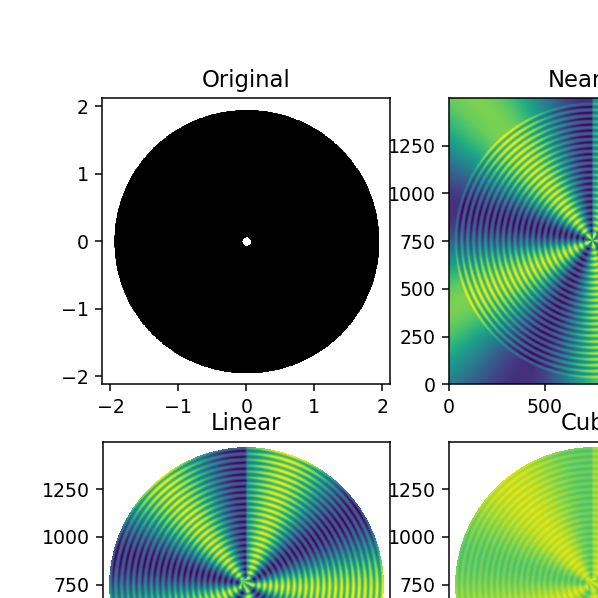

In [4]:
# Bounds and number of the randomly generated data points
ndata = 20
xmin, xmax = -2., 2.
ymin, ymax = -2., 2.

# Generate random data
x = np.random.randint(xmin, xmax, ndata)
y = np.random.randint(ymin, ymax, ndata)
z = np.random.random(ndata)

# Plot the random data points
plt.scatter(xlocs,ylocs,c=data)
#plt.axis([xmin, xmax, ymin, ymax])
plt.colorbar()
plt.show()

In [5]:
# Size of regular grid
ny, nx = 1500, 1500

# Generate a regular grid to interpolate the data.
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xi, yi = np.meshgrid(xi, yi)

#   --- or ---  #

xgrid, ygrid = np.mgrid[-2:2:1500j, -2:2:1500j]

In [6]:
#locs = npl.unstructured_to_structured(np.dstack((xlocs, ylocs))).astype('O')
#grid = npl.unstructured_to_structured(np.dstack((grid_x, grid_y))).astype('O')
locs = np.dstack((xlocs, ylocs)).reshape(xlocs.size,2)
grid = np.dstack((xgrid, ygrid)).reshape(xgrid.size,2)


#locs = np.dstack((xlocs, ylocs)).T
#locs = locs.view([(f'f{i}',locs.dtype) for i in range(locs.shape[-1])])[...,0].astype('O')
# Interpolate using delaunay triangularization 
print(np.shape(locs))
print(type(locs))
print(locs)

zi = griddata(points=locs,
              values=np.ravel(data.T),
              xi=grid,
              method='linear')

(587520, 2)
<class 'numpy.ndarray'>
[[ 0.00000000e+00  9.00900901e-02]
 [ 0.00000000e+00  9.23451058e-02]
 [ 0.00000000e+00  9.46001216e-02]
 ...
 [-4.71101514e-16  1.92341790e+00]
 [-4.71653834e-16  1.92567291e+00]
 [-4.72206153e-16  1.92792793e+00]]


In [7]:

grid_z0 = griddata(points=locs,
              values=np.ravel(data.T),
              xi=grid, method='nearest')

grid_z1 = griddata(points=locs,
              values=np.ravel(data.T),
              xi=grid, method='linear')

grid_z2 = griddata(points=locs,
              values=np.ravel(data.T),
              xi=grid, method='cubic')

In [8]:
print(np.shape(grid_z0.reshape(np.shape(xgrid))))

(1500, 1500)


<function print>

In [9]:
grid_z0 = grid_z0.reshape(np.shape(xgrid))
grid_z1 = grid_z1.reshape(np.shape(xgrid))
grid_z2 = grid_z2.reshape(np.shape(xgrid))

<IPython.core.display.Javascript object>


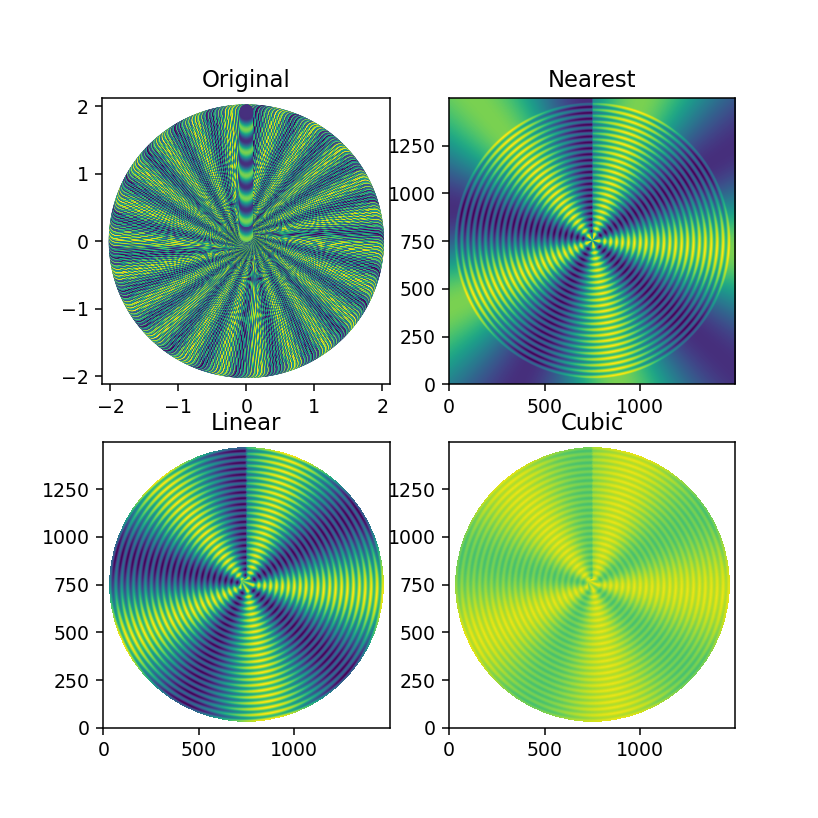

In [13]:
plt.subplot(221)

#plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')

plt.scatter(xlocs,ylocs,c=data)
#plt.plot(locs[:,0], locs[:,1], 'k.', ms=1)

plt.title('Original')

plt.subplot(222)

plt.imshow(grid_z0.T, origin='lower')

plt.title('Nearest')

plt.subplot(223)

plt.imshow(grid_z1.T, origin='lower')

plt.title('Linear')

plt.subplot(224)

plt.imshow(grid_z2.T, origin='lower')

plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)

plt.show()